In [ ]:
* salary.csv를 사용하여 YearsExperience와 Salary를 사용하여 linear regression model을 생성하고 그래프를 출력하고 
임의의 값으로 테스트하시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("salary.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [12]:
year = data['YearsExperience'].values
sal = data['Salary'].values
year.shape, sal.shape   # ((30,), (30,))

year = year.reshape(-1, 1)
sal = sal.reshape(-1, 1)
year.shape, sal.shape  # ((30, 1), (30, 1))

((30, 1), (30, 1))

In [13]:
# 훈련용 데이터와 검증용 데이터로 나눔
yearTrain, yearTest, salTrain, salTest = train_test_split(year, sal, test_size = 1/3, random_state=0)

In [15]:
# 선형회귀를 사용하기 위해 변수 선언
linearTest = LinearRegression()

#  
linearTest.fit(yearTrain, salTrain)

salPrediction = linearTest.predict(yearTest)

# yearTest에 대한 sal 예측값
salPrediction

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

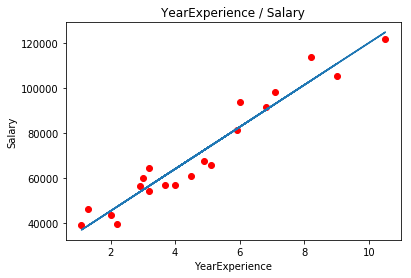

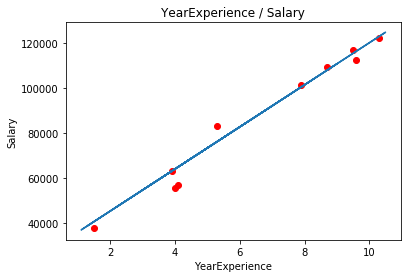

In [18]:
# 학습을 위한 데이터들로 점을 찍어본다.
plt.scatter(yearTrain,salTrain,color="red")
# 이것들에 대한 예측으로 선을 그어버림
plt.plot(yearTrain, linearTest.predict(yearTrain))    # 선이 생김
plt.title("YearExperience / Salary")
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.show()


# 검증을 위한 데이터들로 점을 찍고 예측값과 얼마나 차이가 나는지 봄
plt.scatter(yearTest,salTest,color="red")
plt.plot(yearTrain, linearTest.predict(yearTrain))
plt.title("YearExperience / Salary")
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.show()

In [ ]:
* weather.csv를 사용하여 MinTemp, MaxTemp를 사용하여 linear regression model을 생성하고 테스트하시오.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv("weather.csv")
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.shape   # (119040, 31)

(119040, 31)

In [36]:
MaxT = data['MaxTemp'].values
MinT = data['MinTemp'].values
MaxT.shape, MinT.shape # ((119040,), (119040,))
# print(MaxT)

MaxT = MaxT.reshape(-1,1)
MinT = MinT.reshape(-1,1)
MaxT.shape, MinT.shape
MaxT

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [30]:
linearTest = LinearRegression()
mintTrain, mintTest, maxtTrain, maxtTest = train_test_split(MinT, MaxT, test_size = 0.3, random_state=0)

linearTest.fit(mintTrain, maxtTrain)

maxtPrediction = linearTest.predict(mintTest)

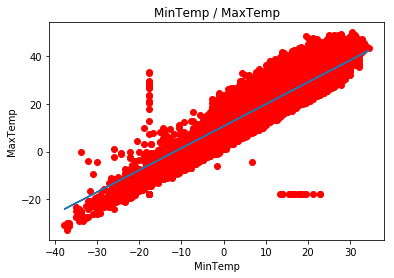

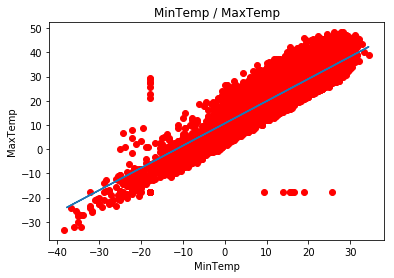

In [31]:
#
plt.scatter(mintTrain,maxtTrain,color="red")
# 이것들에 대한 예측으로 선을 그어버림
plt.plot(mintTrain, linearTest.predict(mintTrain))    # 선이 생김
plt.title("MinTemp / MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()


# 검증을 위한 데이터들로 점을 찍고 예측값과 얼마나 차이가 나는지 봄
plt.scatter(mintTest,maxtTest,color="red")
plt.plot(mintTrain, linearTest.predict(mintTrain))
plt.title("MinTemp / MaxTemp")
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

In [ ]:
* Diabetes.csv를 사용하여 Outcome을 예측하시오.(Logistics Regression)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
data = pd.read_csv("Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
sel_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

elements = data[sel_cols].values
outcome = data['Outcome'].values.reshape(-1, 1)

elements.shape, outcome.shape

((768, 8), (768, 1))

In [49]:
elementstrain, elementstest, outcometrain, outcometest = train_test_split(elements, outcome, test_size = 0.3, random_state=0)

logRegTest = LogisticRegression()
logRegTest.fit(elementstrain, outcometrain)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
outPrediction = logRegTest.predict(elementstest)

data2 = pd.DataFrame({'pre':outPrediction.flatten(), 'outcometest':outcometest.flatten()})
data2.head(10)

,pre,outcometest
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [51]:
# 여기 값이 0에 가까울 수록 정확도가 높다는 뜻
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(outPrediction,outcometest))    # 0.4652421051992354

0.4652421051992354